## Image recognition. Распознавание изображений

Используемые библиотеки: **TensorFlow** и **Matplotlib**

В данном ноутбуке показан пример распознания изображений разных категорий. Для начала импортируем библиотеки.

In [20]:
import tensorflow as tf
from tensorflow import keras
from keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow.python.keras.models import Sequential

Теперь загрузим тренировочный и тестовые датасеты

In [22]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images, test_images = train_images/255.0, test_images / 255.0

In [1]:
class_names = ['самолет', 'автомобиль', 'птица', 'кошка', 'олень', 'собака', 'лягушка', 'лошадь', 'овца', 'грузовик']
plt.figure(figsize = (10, 10))

# Выведем 25 изображений 
for i in range (25):
    plt.subplot(5,5, i+1)
    
    plt.xticks([])
    plt.yticks([]) # отключаем отображение координат x,y чтобы было видно лучше изображение
    
    plt.grid(False) # отключаем сетку
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

NameError: name 'plt' is not defined

Добавляем в функцию фильтры (их 128 в этом примере) которые вычисляют собственные парамеры автоматически на базе тренировочных обозначений. В конечном итоге функции будут производить категоризацию валидационных изображений. 

Чтобы очистить тензоры от не цветовых значений которые не удалось нормализовать - привести к размеру от 0 до 255, мы используем параметр 'relu' - данный метод активации отсечет часть тензора которая не является числом в диапазоне от 0 до 1. Так мы получим набор только цветовых изображений пикселей. 

С помощью параметра input_shape мы определяем какого размера наше изображение, с помощью какой цветовой модели оно обозначается.

In [24]:
model = Sequential() # обозначим модель

In [25]:
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(32,32,3))) # добавляем в модель слой сверточной двумерной сети
model.add(layers.MaxPooling2D((2,2)))

In [26]:
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))

In [27]:
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))

In [28]:
model.build(input_shape=(None, 32,32,3))

In [29]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper_8 (ModuleWrap (None, 30, 30, 32)        896       
_________________________________________________________________
module_wrapper_9 (ModuleWrap (None, 15, 15, 32)        0         
_________________________________________________________________
module_wrapper_10 (ModuleWra (None, 13, 13, 64)        18496     
_________________________________________________________________
module_wrapper_11 (ModuleWra (None, 6, 6, 64)          0         
_________________________________________________________________
module_wrapper_12 (ModuleWra (None, 4, 4, 128)         73856     
Total params: 93,248
Trainable params: 93,248
Non-trainable params: 0
_________________________________________________________________


Теперь преобразуем набор пикселей изображений размером 32х32 в одномерный массив, выстроим их в "ряд".


In [30]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper_8 (ModuleWrap (None, 30, 30, 32)        896       
_________________________________________________________________
module_wrapper_9 (ModuleWrap (None, 15, 15, 32)        0         
_________________________________________________________________
module_wrapper_10 (ModuleWra (None, 13, 13, 64)        18496     
_________________________________________________________________
module_wrapper_11 (ModuleWra (None, 6, 6, 64)          0         
_________________________________________________________________
module_wrapper_12 (ModuleWra (None, 4, 4, 128)         73856     
_________________________________________________________________
module_wrapper_13 (ModuleWra (None, 2048)              0         
_________________________________________________________________
module_wrapper_14 (ModuleWra (None, 64)               

Мы добавили два полносвязных слоя к этой моделе - они отображаются двумя последними строками этой таблицы. Кол-во параметров увеличилось.

Соберем модель. Для этого нам понадабиться функция потерь и функция-оптимизатор.

Функция оптимизатор - переопределяет параметры тех самых 128 функций-фильтраторов, а с помощью Функции потерь мы узнаем точность распознования тестовых изображений.

In [31]:
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy']) # Параметр metrics позволяет определить как часто нейросеть будет правильно категоризировать изображение, относительно их настоящих ярлыков.

history = model.fit(train_images, train_labels, epochs = 10, validation_data = (test_images, test_labels)) # Скормим нейросети датасет в 10 этапов чтобы улучшить точность


Epoch 1/10
1563/1563 [==============================] - 67s 43ms/step - loss: 1.4625 - accuracy: 0.4687 - val_loss: 1.2390 - val_accuracy: 0.5525
Epoch 2/10
1563/1563 [==============================] - 58s 37ms/step - loss: 1.0743 - accuracy: 0.6220 - val_loss: 1.0321 - val_accuracy: 0.6343
Epoch 3/10
1563/1563 [==============================] - 57s 37ms/step - loss: 0.9143 - accuracy: 0.6803 - val_loss: 0.9670 - val_accuracy: 0.6656
Epoch 4/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.8202 - accuracy: 0.7123 - val_loss: 0.9268 - val_accuracy: 0.6877
Epoch 5/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.7467 - accuracy: 0.7391 - val_loss: 0.8312 - val_accuracy: 0.7175
Epoch 6/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.6745 - accuracy: 0.7631 - val_loss: 0.8562 - val_accuracy: 0.7124
Epoch 7/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.6183 - accuracy: 0.7853 - val_loss: 0.8865 -

Параметры **loss** и **accuracy** харакетиризуют параметры обучения.

**validation_loss** - потери, **val_accuracy** - точность обучения

В итоге можно построить график скорости и качества обучения.

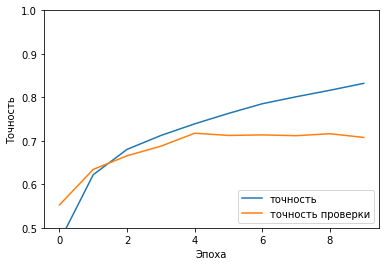

In [32]:
plt.plot(history.history['accuracy'], label = 'точность')
plt.plot(history.history['val_accuracy'], label = 'точность проверки')

# Задаем названия осям х и у
plt.xlabel('Эпоха')
plt.ylabel('Точность')

# Зададим пограничные значения осей координат, чтобы график был более наглядный
plt.ylim([0.5, 1])
plt.legend(loc = 'lower right') # Расположение легенды на графике - внизу слева.

Вывод: точность распознавания изображений составяет 0.83